Ahora, vamos a aprender a extraer datos y mostrarlos gracias a la librería matplotlib.

Importamos las librerías que nos hacen falta

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

Vamos a hacer un gráfico de barras básico con notas de un alumno en sus Asignaturas

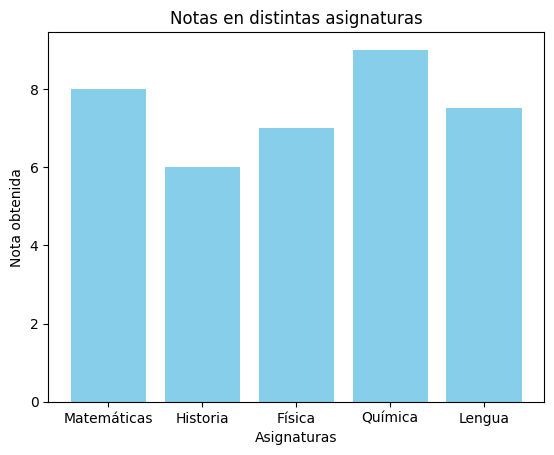

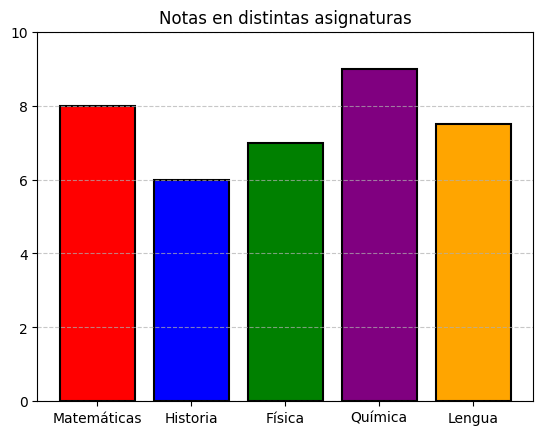

In [6]:
# Datos
asignaturas = ["Matemáticas", "Historia", "Física", "Química", "Lengua"]
notas = [8, 6, 7, 9, 7.5]

# Crear el gráfico de barras
plt.bar(asignaturas, notas, color='skyblue')

# Etiquetas y título
plt.xlabel("Asignaturas")
plt.ylabel("Nota obtenida")
plt.title("Notas en distintas asignaturas")

# Mostrar el gráfico
plt.show()

# Para dejar la gráfica un poco más bonita 
plt.bar(asignaturas, notas, color=['red', 'blue', 'green', 'purple', 'orange'], edgecolor="black", linewidth=1.5)

plt.ylim(0, 10)  # Fijar límites del eje Y
plt.grid(axis="y", linestyle="--", alpha=0.7)  # Líneas de guía horizontales
plt.title("Notas en distintas asignaturas")
plt.show()

Ahora vamos a intentar crear varias gráficas extrayendo los datos desde un .csv

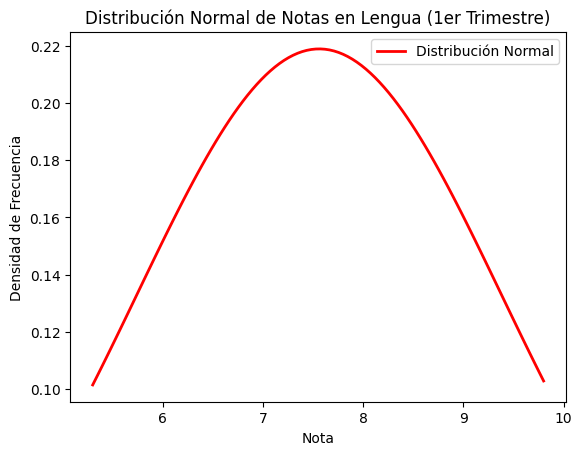

In [ ]:

# Cargar el archivo CSV que contiene las notas
df = pd.read_csv("./datos/notas.csv")  # Se lee el archivo CSV. Asegúrate de que la ruta sea correcta

# Filtrar las filas donde la asignatura es "Lengua" y el trimestre es el 1
notas_lengua_t1 = df[(df["Asignatura"] == "Lengua") & (df["Trimestre"] == 1)]["Nota"]
# Aquí estamos seleccionando solo las notas de Lengua para el primer trimestre.

media = np.mean(notas_lengua_t1)  # np.mean calcula el promedio de las notas
desviacion = np.std(notas_lengua_t1)  # np.std calcula la desviación estándar de las notas

# Crear un rango de valores para graficar la distribución normal
# La función np.linspace genera un array de números desde el valor mínimo de las notas hasta el valor máximo, con 100 puntos intermedios
x = np.linspace(min(notas_lengua_t1), max(notas_lengua_t1), 100)

# Calcular la densidad de la distribución normal para cada valor en 'x'
# norm.pdf calcula la función de densidad de probabilidad para una distribución normal con la media y desviación estándar dadas
y = norm.pdf(x, media, desviacion)

plt.plot(x, y, color='red', linewidth=2, label="Distribución Normal")

# Añadir etiquetas y título al gráfico
plt.xlabel("Nota")  
plt.ylabel("Densidad de Frecuencia")  
plt.title("Distribución Normal de Notas en Lengua (1er Trimestre)")  
plt.legend() 
plt.show()

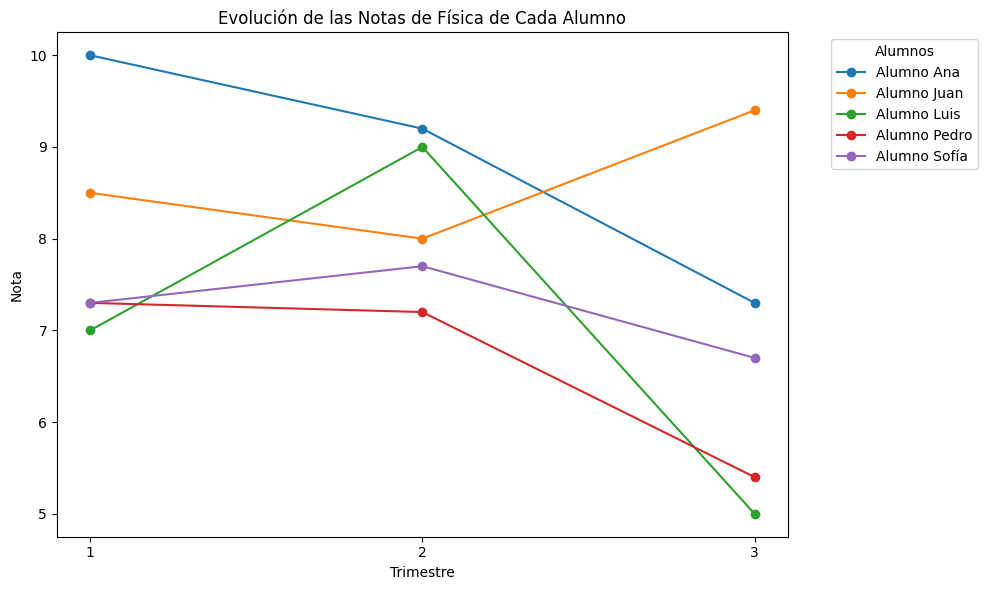

In [7]:
# Filtrar las notas de Física
notas_fisica = df[df["Asignatura"] == "Física"]

# Agrupar por alumno y trimestre, luego obtener las notas
# Aquí asumimos que hay una columna "Alumno" que identifica a cada estudiante
notas_fisica_grouped = notas_fisica.groupby(["Alumno", "Trimestre"])["Nota"].mean().reset_index()

plt.figure(figsize=(10, 6))  # Tamaño del gráfico

# Iterar sobre los alumnos y graficar sus notas en cada trimestre
for alumno in notas_fisica_grouped["Alumno"].unique():
    # Filtrar las notas para un alumno específico
    notas_alumno = notas_fisica_grouped[notas_fisica_grouped["Alumno"] == alumno]
    
    # Graficar la evolución de las notas de ese alumno
    plt.plot(notas_alumno["Trimestre"], notas_alumno["Nota"], marker='o', label=f"Alumno {alumno}")

# Etiquetas y título
plt.xlabel("Trimestre")  # Eje X: Trimestres
plt.ylabel("Nota")  # Eje Y: Nota
plt.title("Evolución de las Notas de Física de Cada Alumno")  # Título del gráfico
plt.xticks([1, 2, 3])  # Aseguramos que solo haya 3 trimestres en el eje X
plt.legend(title="Alumnos", bbox_to_anchor=(1.05, 1), loc='upper left')  # Leyenda a la derecha

# Mostrar gráfico
plt.tight_layout()  # Ajustar el diseño para evitar solapamientos
plt.show()

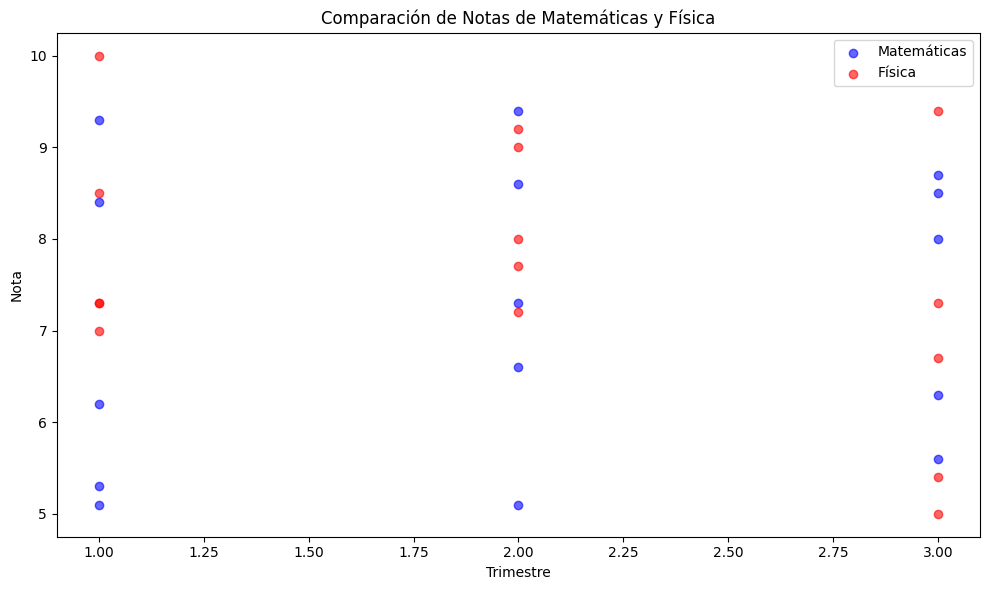

In [ ]:
# Filtrar datos para Matemáticas y Física
df_matematicas = df[df["Asignatura"] == "Matemáticas"]
df_fisica = df[df["Asignatura"] == "Física"]

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(df_matematicas["Trimestre"], df_matematicas["Nota"], label="Matemáticas", color='b', alpha=0.6)
plt.scatter(df_fisica["Trimestre"], df_fisica["Nota"], label="Física", color='r', alpha=0.6)

plt.xlabel("Trimestre")
plt.ylabel("Nota")
plt.title("Comparación de Notas de Matemáticas y Física")
plt.legend()

# Mostrar gráfico
plt.tight_layout()
plt.show()